In [1]:
import ee
import pandas as pd
from shapely.geometry import Point, shape

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# Define Georgia county names impacted by Hurricane Helene
county_names = [
    "Bacon", "Atkinson", "Glynn", "Coffee", "Wheeler",
    "Appling", "Colquitt", "Chatham", "Rabun", "Thomas"
]

# Load Georgia counties and filter to only the ones of interest
counties = ee.FeatureCollection('TIGER/2016/Counties') \
    .filter(ee.Filter.eq('STATEFP', '13')) \
    .filter(ee.Filter.inList('NAME', county_names))

geometry = counties.geometry()

# Get convex hull of the selected counties
hull_polygon = shape(geometry.convexHull().getInfo())

# Define years and initialize storage
years = range(2024, 2014, -1)
all_data = []

# Loop through years and collect SMAP root zone soil moisture data
for year in years:
    print(f"Processing {year}...")
    smap = ee.ImageCollection('NASA/SMAP/SPL4SMGP/007') \
        .filterDate(f'{year}-09-18', f'{year}-09-25') \
        .filterBounds(geometry) \
        .select('sm_rootzone')

    if smap.size().getInfo() == 0:
        print(f"No data for {year}")
        continue

    image = smap.mean().clip(geometry)
    samples = image.sample(region=geometry, scale=10000, numPixels=5000, geometries=True)
    features = samples.getInfo()['features']

    # Filter to points inside convex hull
    year_data = []
    for f in features:
        lon, lat = f['geometry']['coordinates']
        if hull_polygon.contains(Point(lon, lat)):
            year_data.append({
                'year': year,
                'latitude': lat,
                'longitude': lon,
                'sm_rootzone': f['properties'].get('sm_rootzone')
            })

    if year_data:
        all_data.extend(year_data)
        print(f"Collected {len(year_data)} points for {year}")

# Save data to CSV
if all_data:
    df = pd.DataFrame(all_data).sort_values('year')
    df.to_csv("smap_soil_moisture_rootzone_ga_2015_2024_before.csv", index=False)
    print("Saved to smap_soil_moisture_rootzone_ga_2015_2024_before.csv")
else:
    print("No data collected.")

Processing 2024...
Collected 151 points for 2024
Processing 2023...
Collected 151 points for 2023
Processing 2022...
Collected 151 points for 2022
Processing 2021...
Collected 151 points for 2021
Processing 2020...
Collected 151 points for 2020
Processing 2019...
Collected 151 points for 2019
Processing 2018...
Collected 151 points for 2018
Processing 2017...
Collected 151 points for 2017
Processing 2016...
Collected 151 points for 2016
Processing 2015...
Collected 151 points for 2015
Saved to smap_soil_moisture_rootzone_ga_2015_2024_before.csv


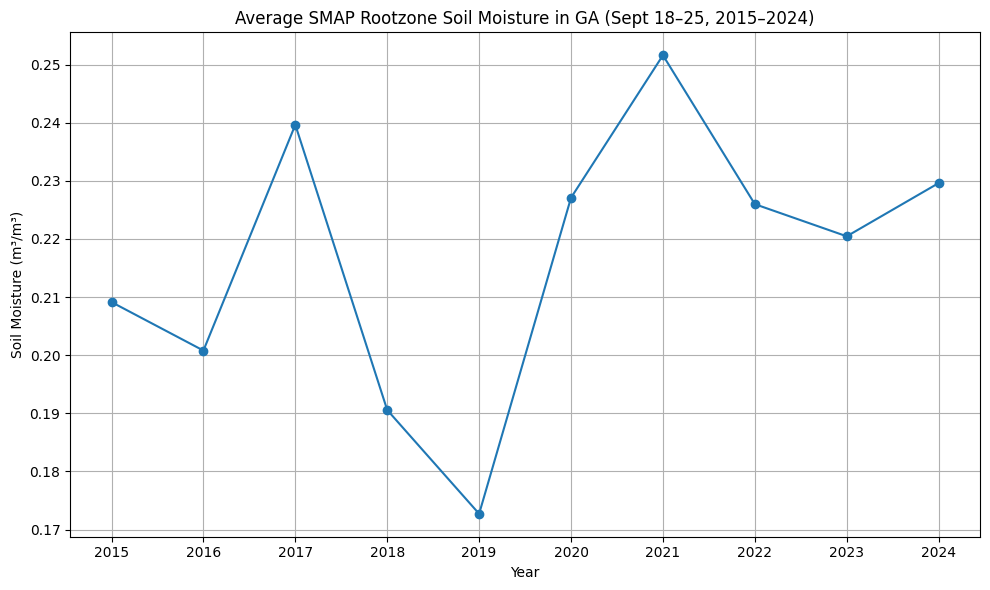

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined CSV
df = pd.read_csv('smap_soil_moisture_rootzone_ga_2015_2024_before.csv')

# Group by year and calculate the mean soil moisture
yearly_avg = df.groupby('year')['sm_rootzone'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg['year'], yearly_avg['sm_rootzone'], marker='o', linestyle='-')
plt.title('Average SMAP Rootzone Soil Moisture in GA (Sept 18–25, 2015–2024)')
plt.xlabel('Year')
plt.ylabel('Soil Moisture (m³/m³)')
plt.grid(True)
plt.xticks(yearly_avg['year'])  # Ensure all years show on the x-axis
plt.tight_layout()
plt.savefig('soil_moisture_trend.png')  # Optional: save the plot
plt.show()

In [3]:
import ee
import pandas as pd
from shapely.geometry import Point, shape

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# Define Georgia county names impacted by Hurricane Helene
county_names = [
    "Bacon", "Atkinson", "Glynn", "Coffee", "Wheeler",
    "Appling", "Colquitt", "Chatham", "Rabun", "Thomas"
]

# Load Georgia counties and filter to only the ones of interest
counties = ee.FeatureCollection('TIGER/2016/Counties') \
    .filter(ee.Filter.eq('STATEFP', '13')) \
    .filter(ee.Filter.inList('NAME', county_names))

geometry = counties.geometry()

# Get convex hull of the selected counties
hull_polygon = shape(geometry.convexHull().getInfo())

# Define years and initialize storage
years = range(2024, 2014, -1)
all_data = []

# Loop through years and collect SMAP root zone soil moisture data
for year in years:
    print(f"Processing {year}...")
    smap = ee.ImageCollection('NASA/SMAP/SPL4SMGP/007') \
        .filterDate(f'{year}-09-18', f'{year}-09-25') \
        .filterBounds(geometry) \
        .select('sm_surface')

    if smap.size().getInfo() == 0:
        print(f"No data for {year}")
        continue

    image = smap.mean().clip(geometry)
    samples = image.sample(region=geometry, scale=10000, numPixels=5000, geometries=True)
    features = samples.getInfo()['features']

    # Filter to points inside convex hull
    year_data = []
    for f in features:
        lon, lat = f['geometry']['coordinates']
        if hull_polygon.contains(Point(lon, lat)):
            year_data.append({
                'year': year,
                'latitude': lat,
                'longitude': lon,
                'sm_surface': f['properties'].get('sm_surface')
            })

    if year_data:
        all_data.extend(year_data)
        print(f"Collected {len(year_data)} points for {year}")

# Save data to CSV
if all_data:
    df = pd.DataFrame(all_data).sort_values('year')
    df.to_csv("smap_soil_moisture_surface_ga_2015_2024_before.csv", index=False)
    print("Saved to smap_soil_moisture_surface_ga_2015_2024_before.csv")
else:
    print("No data collected.")

Processing 2024...
Collected 151 points for 2024
Processing 2023...
Collected 151 points for 2023
Processing 2022...
Collected 151 points for 2022
Processing 2021...
Collected 151 points for 2021
Processing 2020...
Collected 151 points for 2020
Processing 2019...
Collected 151 points for 2019
Processing 2018...
Collected 151 points for 2018
Processing 2017...
Collected 151 points for 2017
Processing 2016...
Collected 151 points for 2016
Processing 2015...
Collected 151 points for 2015
Saved to smap_soil_moisture_surface_ga_2015_2024_before.csv


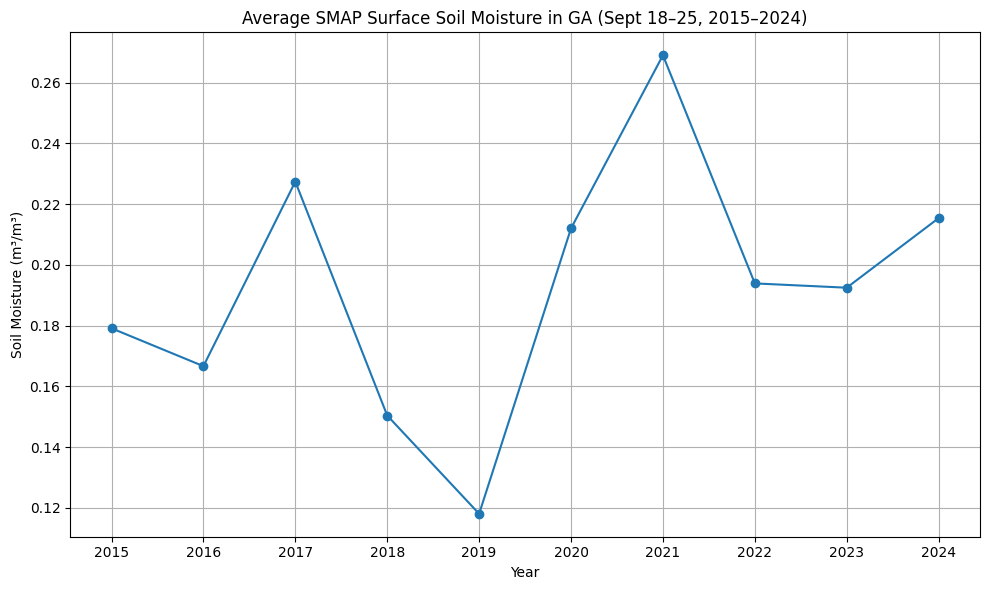

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined CSV
df = pd.read_csv('smap_soil_moisture_surface_ga_2015_2024_before.csv')

# Group by year and calculate the mean soil moisture
yearly_avg = df.groupby('year')['sm_surface'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg['year'], yearly_avg['sm_surface'], marker='o', linestyle='-')
plt.title('Average SMAP Surface Soil Moisture in GA (Sept 18–25, 2015–2024)')
plt.xlabel('Year')
plt.ylabel('Soil Moisture (m³/m³)')
plt.grid(True)
plt.xticks(yearly_avg['year'])  # Ensure all years show on the x-axis
plt.tight_layout()
plt.savefig('soil_moisture_trend.png')  # Optional: save the plot
plt.show()

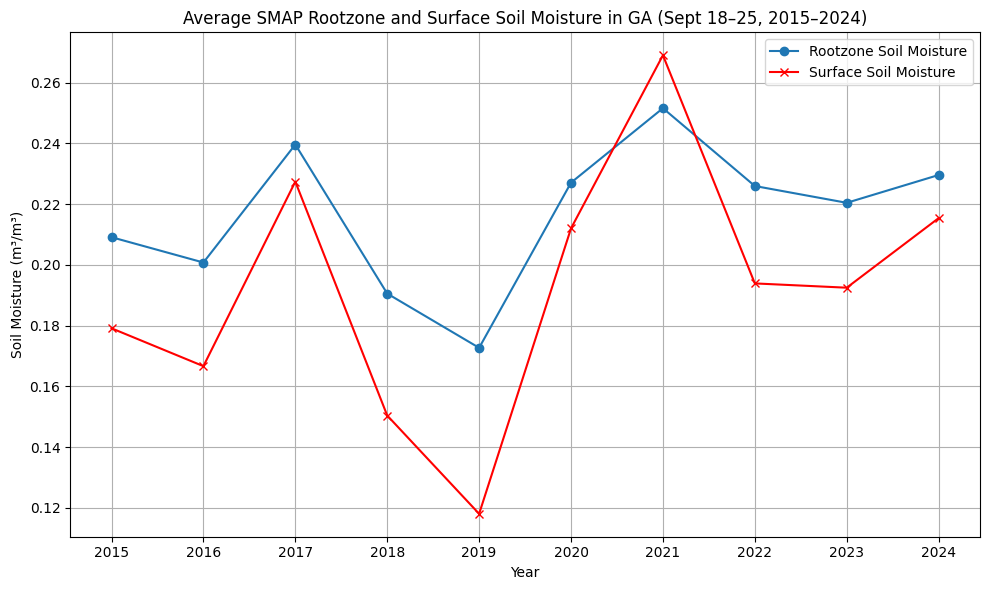

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined CSV
df1 = pd.read_csv('smap_soil_moisture_rootzone_ga_2015_2024_before.csv')

# Group by year and calculate the mean soil moisture
yearly_avg1 = df1.groupby('year')['sm_rootzone'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Rootzone plot
plt.plot(
    yearly_avg1['year'],
    yearly_avg1['sm_rootzone'],
    marker='o',
    linestyle='-',
    label='Rootzone Soil Moisture'
)

# Surface plot (assuming 'yearly_avg' and 'sm_surface' are already defined elsewhere)
plt.plot(
    yearly_avg['year'],
    yearly_avg['sm_surface'],
    marker='x',
    linestyle='-',
    color='r',
    label='Surface Soil Moisture'
)

# Add title and labels
plt.title('Average SMAP Rootzone and Surface Soil Moisture in GA (Sept 18–25, 2015–2024)')
plt.xlabel('Year')
plt.ylabel('Soil Moisture (m³/m³)')
plt.legend()  # Now the legend will show the two lines
plt.grid(True)
plt.xticks(yearly_avg1['year'])  # Show each year on x-axis
plt.tight_layout()
plt.savefig('soil_moisture_trend.png')  # Optional: save the plot
plt.show()

In [7]:
import pandas as pd
from scipy import stats

# Load both datasets
df_root = pd.read_csv("smap_soil_moisture_rootzone_ga_2015_2024_before.csv")
df_surface = pd.read_csv("smap_soil_moisture_surface_ga_2015_2024_before.csv")

# Compute yearly means
root_yearly = df_root.groupby('year')['sm_rootzone'].mean().reset_index()
surface_yearly = df_surface.groupby('year')['sm_surface'].mean().reset_index()

# --- Rootzone Analysis ---
past_root = root_yearly[root_yearly['year'] < 2024]
val_root_2024 = root_yearly[root_yearly['year'] == 2024]['sm_rootzone'].values[0]
mean_root_10yr = past_root['sm_rootzone'].mean()
t_root, p_root = stats.ttest_1samp(past_root['sm_rootzone'], val_root_2024)

# --- Surface Analysis ---
past_surface = surface_yearly[surface_yearly['year'] < 2024]
val_surface_2024 = surface_yearly[surface_yearly['year'] == 2024]['sm_surface'].values[0]
mean_surface_10yr = past_surface['sm_surface'].mean()
t_surface, p_surface = stats.ttest_1samp(past_surface['sm_surface'], val_surface_2024)

# --- Results ---
print("🟫 ROOTZONE SOIL MOISTURE")
print(f"10-Year Avg (2015–2023): {mean_root_10yr:.4f}")
print(f"2024 Avg: {val_root_2024:.4f}")
print(f"T-statistic: {t_root:.3f}, P-value: {p_root:.4f}")
if p_root < 0.05 and val_root_2024 < mean_root_10yr:
    print("✅ 2024 is significantly lower (p < 0.05).")
else:
    print("❌ 2024 is NOT significantly lower.")

print("\n🟥 SURFACE SOIL MOISTURE")
print(f"10-Year Avg (2015–2023): {mean_surface_10yr:.4f}")
print(f"2024 Avg: {val_surface_2024:.4f}")
print(f"T-statistic: {t_surface:.3f}, P-value: {p_surface:.4f}")
if p_surface < 0.05 and val_surface_2024 < mean_surface_10yr:
    print("✅ 2024 is significantly lower (p < 0.05).")
else:
    print("❌ 2024 is NOT significantly lower.")

🟫 ROOTZONE SOIL MOISTURE
10-Year Avg (2015–2023): 0.2153
2024 Avg: 0.2296
T-statistic: -1.737, P-value: 0.1206
❌ 2024 is NOT significantly lower.

🟥 SURFACE SOIL MOISTURE
10-Year Avg (2015–2023): 0.1899
2024 Avg: 0.2154
T-statistic: -1.735, P-value: 0.1210
❌ 2024 is NOT significantly lower.


In [2]:
# --- Given data (2024 is higher than the 10-year average) ---
mean_root_10yr = 0.2153
val_root_2024 = 0.2296

mean_surface_10yr = 0.1899
val_surface_2024 = 0.2154

# --- Percent change calculations ---
percent_diff_root = ((val_root_2024 - mean_root_10yr) / mean_root_10yr) * 100
percent_diff_surface = ((val_surface_2024 - mean_surface_10yr) / mean_surface_10yr) * 100

# --- Print results ---
print("📈 Percent Increase in Soil Moisture (2024 vs. 10-Year Avg)\n")

print("🟫 ROOTZONE SOIL MOISTURE")
print(f"10-Year Avg (2015–2023): {mean_root_10yr:.4f}")
print(f"2024 Avg: {val_root_2024:.4f}")
print(f"Percent Increase: {percent_diff_root:.2f}%")
print("❌ 2024 is NOT significantly lower.\n")

print("🟥 SURFACE SOIL MOISTURE")
print(f"10-Year Avg (2015–2023): {mean_surface_10yr:.4f}")
print(f"2024 Avg: {val_surface_2024:.4f}")
print(f"Percent Increase: {percent_diff_surface:.2f}%")
print("❌ 2024 is NOT significantly lower.")


📈 Percent Increase in Soil Moisture (2024 vs. 10-Year Avg)

🟫 ROOTZONE SOIL MOISTURE
10-Year Avg (2015–2023): 0.2153
2024 Avg: 0.2296
Percent Increase: 6.64%
❌ 2024 is NOT significantly lower.

🟥 SURFACE SOIL MOISTURE
10-Year Avg (2015–2023): 0.1899
2024 Avg: 0.2154
Percent Increase: 13.43%
❌ 2024 is NOT significantly lower.


/var/folders/zl/rltftr5d1p73n2c7r94qp6ph0000gn/T/ipykernel_38192/842388192.py:65: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/zl/rltftr5d1p73n2c7r94qp6ph0000gn/T/ipykernel_38192/842388192.py:66: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.savefig('soil_moisture_trend_latest.png')
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


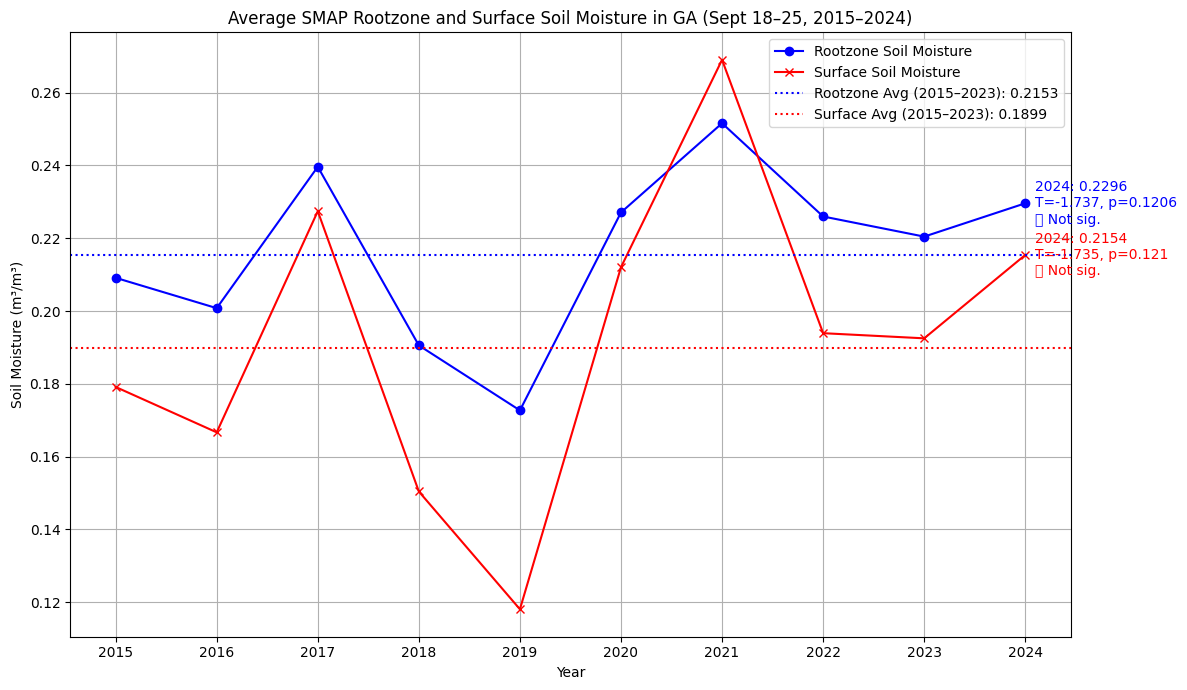

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load rootzone and surface CSVs
df_root = pd.read_csv('smap_soil_moisture_rootzone_ga_2015_2024_before.csv')
df_surf = pd.read_csv('smap_soil_moisture_surface_ga_2015_2024_before.csv')

# Group by year and calculate mean soil moisture
yearly_avg_root = df_root.groupby('year')['sm_rootzone'].mean().reset_index()
yearly_avg_surf = df_surf.groupby('year')['sm_surface'].mean().reset_index()

# Updated averages and statistical test results
rootzone_avg_2015_2023 = 0.2153
rootzone_2024 = 0.2296
rootzone_t = -1.737
rootzone_p = 0.1206

surface_avg_2015_2023 = 0.1899
surface_2024 = 0.2154
surface_t = -1.735
surface_p = 0.1210

# Plotting
plt.figure(figsize=(12, 7))

# Annual moisture lines
plt.plot(
    yearly_avg_root['year'], yearly_avg_root['sm_rootzone'],
    marker='o', linestyle='-', color = 'blue', label='Rootzone Soil Moisture'
)
plt.plot(
    yearly_avg_surf['year'], yearly_avg_surf['sm_surface'],
    marker='x', linestyle='-', color='red', label='Surface Soil Moisture'
)

# Horizontal 10-year average lines
plt.axhline(
    y=rootzone_avg_2015_2023, color='blue', linestyle=':',
    label='Rootzone Avg (2015–2023): 0.2153'
)
plt.axhline(
    y=surface_avg_2015_2023, color='red', linestyle=':',
    label='Surface Avg (2015–2023): 0.1899'
)

# Annotations for 2024 values
plt.text(
    2024.1, rootzone_2024,
    f"2024: {rootzone_2024}\nT={rootzone_t}, p={rootzone_p}\n❌ Not sig.",
    color='blue', va='center'
)
plt.text(
    2024.1, surface_2024,
    f"2024: {surface_2024}\nT={surface_t}, p={surface_p}\n❌ Not sig.",
    color='red', va='center'
)

# Formatting
plt.title('Average SMAP Rootzone and Surface Soil Moisture in GA (Sept 18–25, 2015–2024)')
plt.xlabel('Year')
plt.ylabel('Soil Moisture (m³/m³)')
plt.xticks(yearly_avg_root['year'])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('soil_moisture_trend_latest.png')
plt.show()


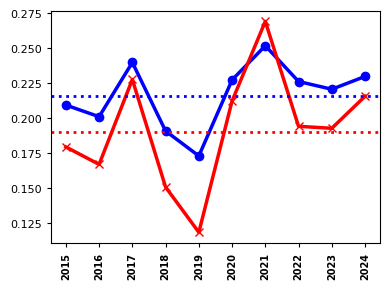

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load rootzone and surface CSVs
df_root = pd.read_csv('smap_soil_moisture_rootzone_ga_2015_2024_before.csv')
df_surf = pd.read_csv('smap_soil_moisture_surface_ga_2015_2024_before.csv')

# Group by year and calculate mean soil moisture
yearly_avg_root = df_root.groupby('year')['sm_rootzone'].mean().reset_index()
yearly_avg_surf = df_surf.groupby('year')['sm_surface'].mean().reset_index()

# Averages and test results
rootzone_avg_2015_2023 = 0.2153
rootzone_2024 = 0.2296
rootzone_t = -1.737
rootzone_p = 0.1206

surface_avg_2015_2023 = 0.1899
surface_2024 = 0.2154
surface_t = -1.735
surface_p = 0.1210

# Create compact figure
plt.figure(figsize=(4, 3))  # Smaller figure for poster inset

# Plot bold lines and markers
plt.plot(
    yearly_avg_root['year'], yearly_avg_root['sm_rootzone'],
    marker='o', markersize=6, linewidth=2.5, linestyle='-', color='blue',
    label='Rootzone Soil Moisture'
)
plt.plot(
    yearly_avg_surf['year'], yearly_avg_surf['sm_surface'],
    marker='x', markersize=6, linewidth=2.5, linestyle='-', color='red',
    label='Surface Soil Moisture'
)

# Horizontal 10-year average lines
plt.axhline(
    y=rootzone_avg_2015_2023, color='blue', linestyle=':', linewidth=2,
    label='Rootzone Avg (2015–2023): 0.2153'
)
plt.axhline(
    y=surface_avg_2015_2023, color='red', linestyle=':', linewidth=2,
    label='Surface Avg (2015–2023): 0.1899'
)



# Formatting for compact display
plt.xlabel('')
plt.ylabel('')
plt.xticks(
    ticks=yearly_avg_root['year'],
    labels=yearly_avg_root['year'].astype(str),
    fontsize=7,
    rotation=90,
    ha='center',
    fontweight='bold',
    color='black'
)
plt.yticks(fontsize=8)
plt.tick_params(length=3)
plt.grid(False)
plt.tight_layout()

# Save and display
plt.savefig('soil_moisture_trend_ga_compact.png', dpi=300)
plt.show()
